#  A PROJECT ON FRAUD DETECTION AND ANALYSIS ON TREND OF FRAUD

## Importing Required Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Loading Dataset

In [2]:
df=pd.read_csv("Fraud_detection.csv")

### Shape of Dataset

In [3]:
print(df.shape)

(14247, 11)


In [4]:
print(df.head(10))

   step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815      170136.00       160296.36   
1     1   PAYMENT   1864.28  C1666544295       21249.00        19384.72   
2     1  TRANSFER    181.00  C1305486145         181.00            0.00   
3     1  CASH_OUT    181.00   C840083671         181.00            0.00   
4     1   PAYMENT  11668.14  C2048537720       41554.00        29885.86   
5     1   PAYMENT   7817.71    C90045638       53860.00        46042.29   
6     1   PAYMENT   7107.77   C154988899      183195.00       176087.23   
7     1   PAYMENT   7861.64  C1912850431      176087.23       168225.59   
8     1   PAYMENT   4024.36  C1265012928        2671.00            0.00   
9     1     DEBIT   5337.77   C712410124       41720.00        36382.23   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0  M1979787155             0.0            0.00      0.0             0.0  
1  M2044282225            

In [5]:
print(df.describe())

               step        amount  oldbalanceOrg  newbalanceOrig  \
count  14247.000000  1.424700e+04   1.424600e+04    1.424600e+04   
mean       5.037131  1.118848e+05   7.937369e+05    8.107136e+05   
std        2.463112  2.805152e+05   2.016693e+06    2.059984e+06   
min        1.000000  2.390000e+00   0.000000e+00    0.000000e+00   
25%        2.000000  4.585130e+03   0.000000e+00    0.000000e+00   
50%        6.000000  1.286936e+04   2.041500e+04    8.216325e+03   
75%        7.000000  1.218917e+05   1.384956e+05    1.294173e+05   
max        8.000000  1.000000e+07   1.293042e+07    1.301050e+07   

       oldbalanceDest  newbalanceDest       isFraud  isFlaggedFraud  
count    1.424600e+04    1.424600e+04  14246.000000         14246.0  
mean     8.411336e+05    1.147629e+06      0.005475             0.0  
std      2.528174e+06    3.151706e+06      0.073794             0.0  
min      0.000000e+00    0.000000e+00      0.000000             0.0  
25%      0.000000e+00    0.000000e+00

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14247 entries, 0 to 14246
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            14247 non-null  int64  
 1   type            14247 non-null  object 
 2   amount          14247 non-null  float64
 3   nameOrig        14247 non-null  object 
 4   oldbalanceOrg   14246 non-null  float64
 5   newbalanceOrig  14246 non-null  float64
 6   nameDest        14246 non-null  object 
 7   oldbalanceDest  14246 non-null  float64
 8   newbalanceDest  14246 non-null  float64
 9   isFraud         14246 non-null  float64
 10  isFlaggedFraud  14246 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 1.2+ MB


In [7]:
df.corr()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
step,1.000000,0.040947,-0.065173,-0.065322,-0.005285,0.033043,-0.024286,NaN
amount,0.040947,1.000000,0.092782,0.062145,0.362895,0.459616,0.133739,NaN
oldbalanceOrg,-0.065173,0.092782,1.000000,0.996683,0.196803,0.148137,-0.005359,NaN
newbalanceOrig,-0.065322,0.062145,0.996683,1.000000,0.203862,0.150776,-0.027849,NaN
oldbalanceDest,-0.005285,0.362895,0.196803,0.203862,1.000000,0.908342,-0.018103,NaN
newbalanceDest,0.033043,0.459616,0.148137,0.150776,0.908342,1.000000,-0.009828,NaN
isFraud,-0.024286,0.133739,-0.005359,-0.027849,-0.018103,-0.009828,1.000000,NaN
isFlaggedFraud,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
print(df.groupby('type').size()) 

type
CASH_IN     2472
CASH_OUT    2055
DEBIT        413
PAYMENT     7869
TRANSFER    1438
dtype: int64


In [9]:
print(df.groupby('isFraud').size()) 

isFraud
0.0    14168
1.0       78
dtype: int64


### Checking For Null Values

In [10]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     1
newbalanceOrig    1
nameDest          1
oldbalanceDest    1
newbalanceDest    1
isFraud           1
isFlaggedFraud    1
dtype: int64

In [11]:
df.dropna(inplace=True)

In [12]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

### Deleting Not Required Coloumns

In [13]:
df_new=df.drop(["nameOrig","nameDest","isFlaggedFraud"],axis=1)

In [14]:
df_new

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0.0
1,1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0.0
2,1,TRANSFER,181.00,181.0,0.00,0.0,0.0,1.0
3,1,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,1.0
4,1,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
14241,8,PAYMENT,35108.12,0.0,0.00,0.0,0.0,0.0
14242,8,PAYMENT,20924.47,18265.0,0.00,0.0,0.0,0.0
14243,8,CASH_OUT,75244.54,38369.0,0.00,167.0,0.0,0.0
14244,8,PAYMENT,3074.36,10242.0,7167.64,0.0,0.0,0.0


## Data Visualization

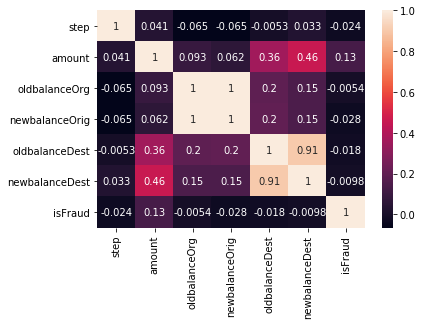

In [15]:
sns.heatmap(df_new.corr(),annot=True)

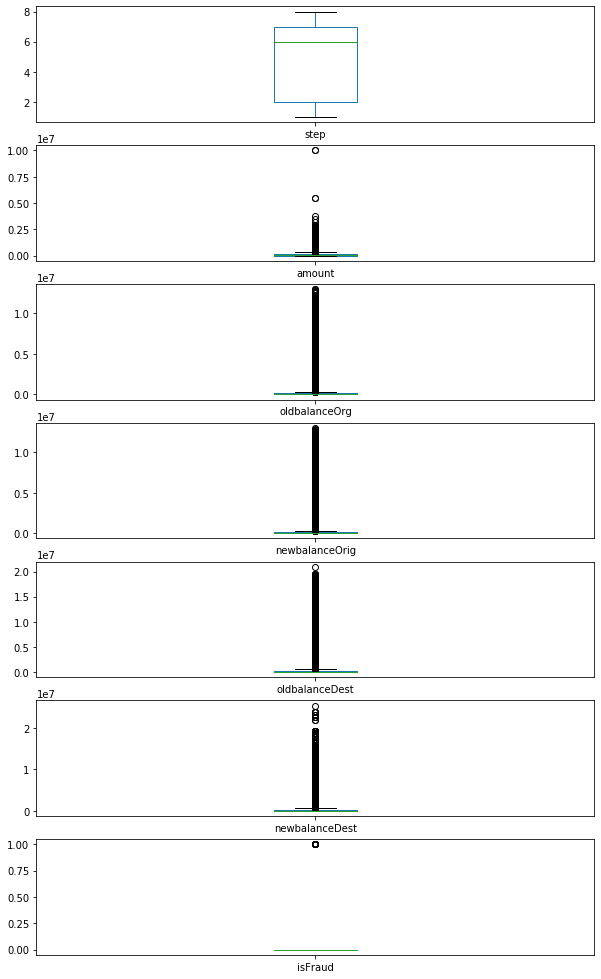

In [16]:
df_new.plot(kind='box', subplots= True, layout=(8,1),sharex = False, sharey= False,figsize=(10,20))
plt.show()

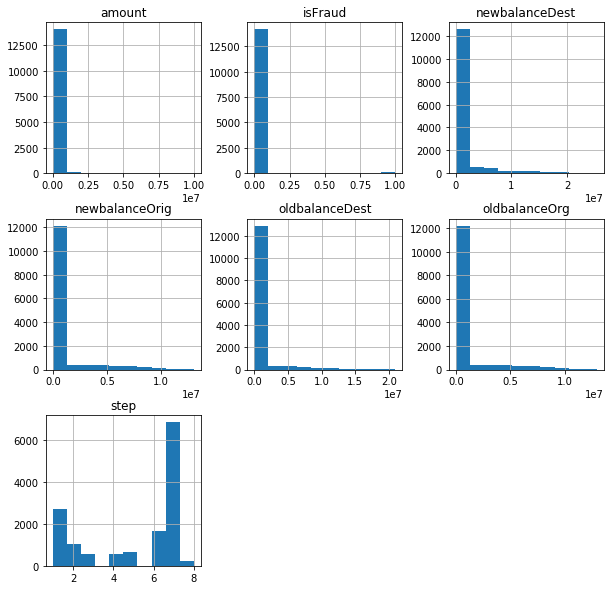

In [17]:
df_new.hist(figsize=(10,10))
plt.show()

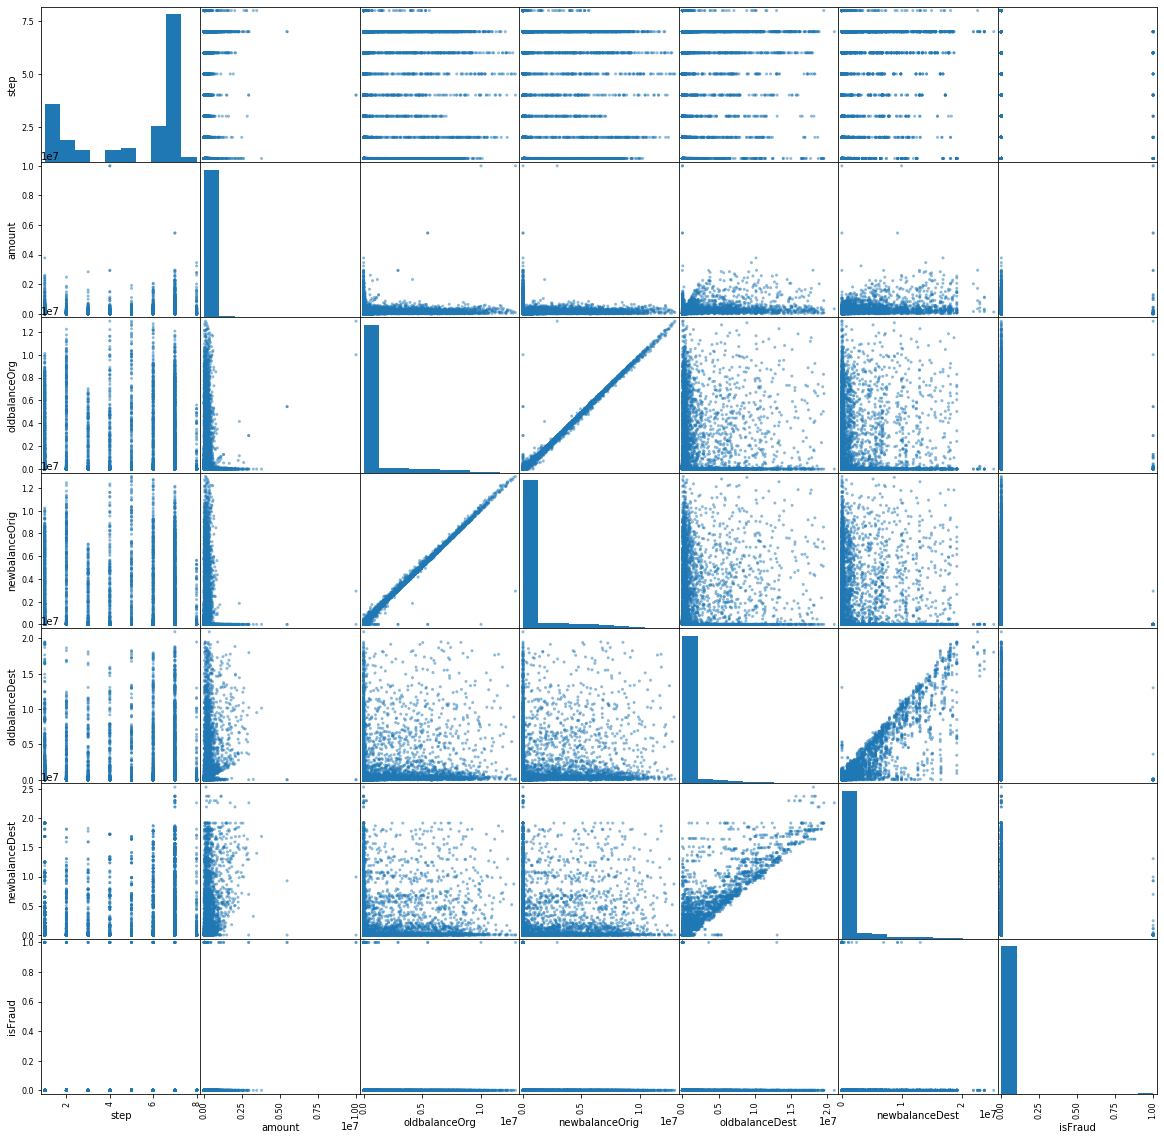

In [18]:
from pandas.plotting import scatter_matrix
scatter_matrix(df_new)
plt.gcf().set_size_inches((20, 20)) 
plt.show()

In [19]:
df_new.drop(['newbalanceDest','oldbalanceOrg'],inplace=True,axis=1)

## String Values to Numbers

In [20]:
DF=df_new.replace("PAYMENT",0)
DF1=DF.replace("CASH_IN",1)
df=DF1.replace("CASH_OUT",2)
df1_new=df.replace("TRANSFER",3)
df2_new=df1_new.replace("PAYMENT",4)
df_new=df2_new.replace("DEBIT",5)

In [21]:
df_new.head()

,step,type,amount,newbalanceOrig,oldbalanceDest,isFraud
0,1,0,9839.64,160296.36,0.0,0.0
1,1,0,1864.28,19384.72,0.0,0.0
2,1,3,181.00,0.00,0.0,1.0
3,1,2,181.00,0.00,21182.0,1.0
4,1,0,11668.14,29885.86,0.0,0.0


In [22]:
X=df_new.drop(["isFraud"],axis=1)
Y=df_new["isFraud"]

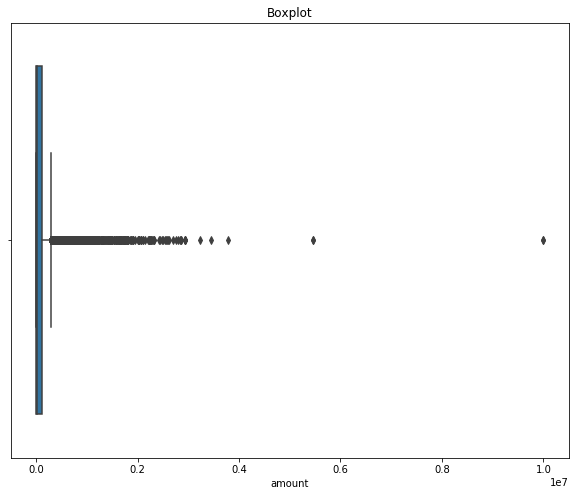

In [23]:
plt.figure(figsize=(10,8))
bx =sns.boxplot(x= "amount",data = X )
bx.set_title("Boxplot")
plt.show()

Figure(432x288)
AxesSubplot(0.125,0.125;0.775x0.755)


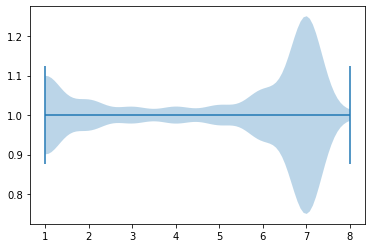

In [24]:
fig,ax=plt.subplots()
print(fig)
print(ax)
ax.violinplot(X["step"],vert=False)
plt.show()

# DATA TRAINING

In [25]:
from sklearn.preprocessing import MinMaxScaler

In [26]:
scaler=MinMaxScaler(feature_range=(0,1))
rescaledX=scaler.fit_transform(X)
rescaledX

array([[0.00000000e+00, 0.00000000e+00, 9.83725235e-04, 1.23205354e-02,
        0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 1.86189044e-04, 1.48992859e-03,
        0.00000000e+00],
       [0.00000000e+00, 6.00000000e-01, 1.78610043e-05, 0.00000000e+00,
        0.00000000e+00],
       ...,
       [1.00000000e+00, 4.00000000e-01, 7.52421680e-03, 0.00000000e+00,
        7.97608607e-06],
       [1.00000000e+00, 0.00000000e+00, 3.07197073e-04, 5.50911838e-04,
        0.00000000e+00],
       [1.00000000e+00, 0.00000000e+00, 1.14628227e-03, 0.00000000e+00,
        0.00000000e+00]])

In [27]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [28]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

## LOGISTIC REGRESSION

In [29]:
X=df_new.drop(["isFraud"],axis=1)
Y=df_new["isFraud"]
logit=linear_model.LogisticRegression(C=1e10,max_iter=1e5)
logit.fit(X_train,Y_train)

LogisticRegression(C=10000000000.0, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100000.0, multi_class='auto', n_jobs=None,
                   penalty='l2', random_state=None, solver='lbfgs', tol=0.0001,
                   verbose=0, warm_start=False)

In [30]:
print('Logistic Regression Accuracy Score on Test data:', logit.score(X_test,Y_test))
print('Logistic Regression Accuracy Score on train data:', logit.score(X_train,Y_train))

Logistic Regression Accuracy Score on Test data: 0.9954385964912281
Logistic Regression Accuracy Score on train data: 0.9946472446472446


In [31]:
from sklearn.metrics import confusion_matrix
predictions = logit.predict(X_test)
print(confusion_matrix(Y_test,predictions))

[[2836    1]
 [  12    1]]


## SVM CLASSIFIER

In [32]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [33]:
X=df_new[["type","amount"]].values
Y=df_new['isFraud'].values
X,Y

(array([[0.000000e+00, 9.839640e+03],
        [0.000000e+00, 1.864280e+03],
        [3.000000e+00, 1.810000e+02],
        ...,
        [2.000000e+00, 7.524454e+04],
        [0.000000e+00, 3.074360e+03],
        [0.000000e+00, 1.146521e+04]]),
 array([0., 0., 1., ..., 0., 0., 0.]))

In [34]:
sc = StandardScaler()
X = sc.fit_transform(X)

In [35]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.25)

In [36]:
svm =SVC(kernel="poly")
svm.fit(x_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [37]:
y_pred = svm.predict(x_test)
accuracy_score(y_test,y_pred)

0.9938236945536215

In [38]:
from matplotlib.colors import ListedColormap

In [39]:
setX, setY = x_train, y_train
start = setX[:,0].min() - 1
stop = setX[:,0].max() + 1
x1 = np.arange(start, stop, step=0.01)
start = setX[:,1].min() - 1
stop = setX[:,1].max() + 1
x2 = np.arange(start, stop, step=0.01)
xx,yy = np.meshgrid(x1,x2)

In [40]:
z = svm.predict(np.array([xx.ravel(), yy.ravel()]).T).reshape(xx.shape)
z

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.],
       [1., 1., 1., ..., 0., 0., 0.]])

## POLY KERNEL

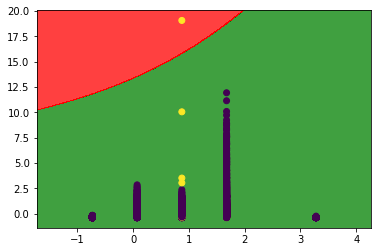

In [41]:
plt.contourf(xx, yy, z, alpha = 0.75, cmap = ListedColormap(('green','red')))
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(),yy.max())
plt.scatter(x_train[:,0],x_train[:,1],c=y_train)
plt.show()

In [42]:
svm =SVC(kernel="rbf")
svm.fit(x_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [43]:
y_pred = svm.predict(x_test)
accuracy_score(y_test,y_pred)

0.9929814710836609

In [44]:
z = svm.predict(np.array([xx.ravel(), yy.ravel()]).T).reshape(xx.shape)
z

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

## RBF KERNEL

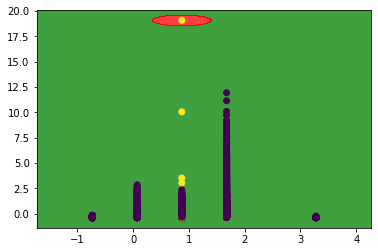

In [45]:
plt.contourf(xx, yy, z, alpha = 0.75, cmap = ListedColormap(('green','red')))
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(),yy.max())
plt.scatter(x_train[:,0],x_train[:,1],c=y_train)
plt.show()

In [46]:
from sklearn.naive_bayes import MultinomialNB, \
 GaussianNB, BernoulliNB
from sklearn import metrics
from sklearn.svm import LinearSVC
svm =LinearSVC()
svm.fit(x_train,y_train)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\svm\_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [47]:
y_pred = svm.predict(x_test)
accuracy_score(y_test,y_pred)

0.9929814710836609

In [48]:
z = svm.predict(np.array([xx.ravel(), yy.ravel()]).T).reshape(xx.shape)
z

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

## LINEARSVC

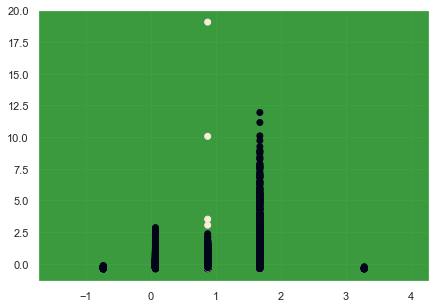

In [49]:
sns.set(rc={"figure.figsize":(7,5)})
plt.contourf(xx, yy, z, alpha = 0.75, cmap = ListedColormap(('green','red')))
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(),yy.max())
plt.scatter(x_train[:,0],x_train[:,1],c=y_train)

plt.show()

In [50]:
accuracy_score(y_test,y_pred)

0.9929814710836609

## DECISION TREE CLASSIFIER

In [51]:
from sklearn.tree import DecisionTreeClassifier

In [52]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

C:\Users\HP\anaconda3\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [53]:
X=df_new.drop(["isFraud"],axis=1)
Y=df_new["isFraud"]
clf = DecisionTreeClassifier()
clf.fit(x_test,y_test)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

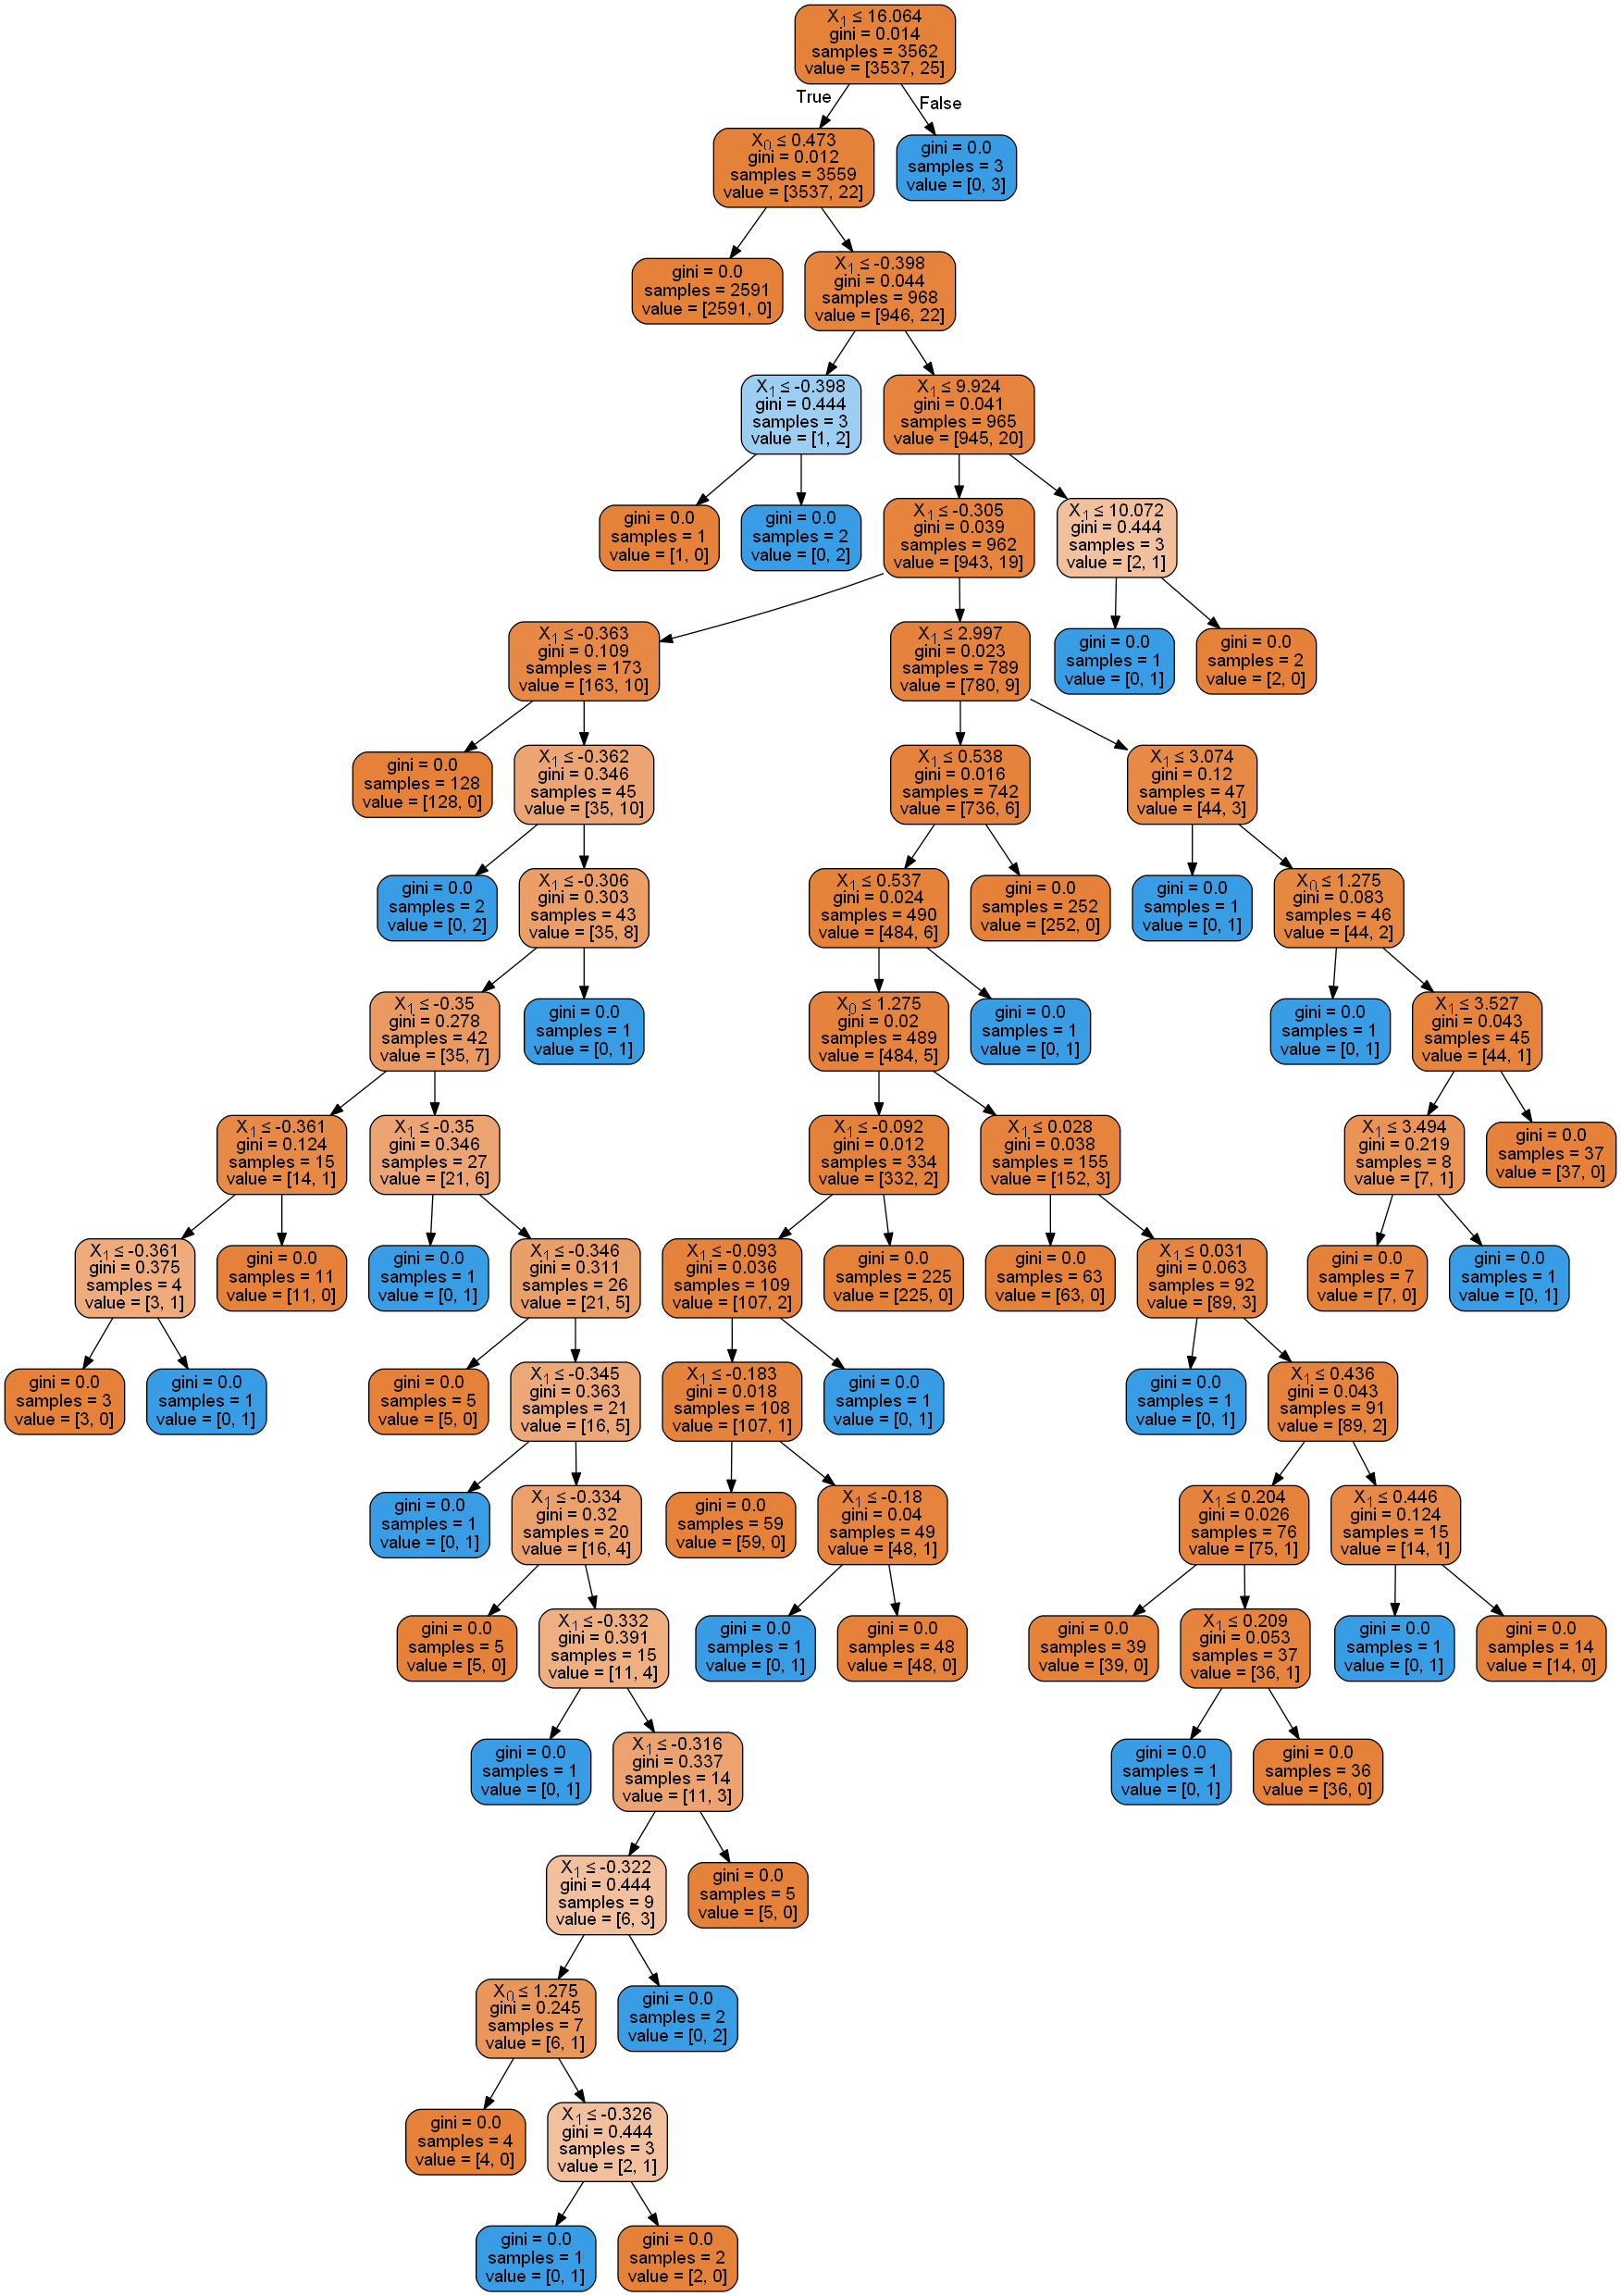

In [54]:
import os

os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data, filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
Image(graph.create_png())


In [55]:
X=df_new.drop(["isFraud"],axis=1)
Y=df_new["isFraud"]

dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train,Y_train)
print('Decision Tree Accuracy Score:', dt_clf.score(X_test,Y_test))

Decision Tree Accuracy Score: 0.9926315789473684


In [56]:
from sklearn.metrics import confusion_matrix
predictions = dt_clf.predict(X_test)
print(confusion_matrix(Y_test,predictions))

[[2823   14]
 [   7    6]]


## NAIVE BAYES CLASSIFIER

## GaussianNB

In [57]:
X=df_new.drop(["isFraud"],axis=1)
Y=df_new["isFraud"]
from sklearn import metrics 
from sklearn.naive_bayes import GaussianNB
gnb= GaussianNB()
gnb.fit(X_train,Y_train)
print('GaussianNB Accuracy Score:', gnb.score(X_test,Y_test))

GaussianNB Accuracy Score: 0.9785964912280701


In [58]:
from sklearn.metrics import confusion_matrix
predictions = gnb.predict(X_test)
print(confusion_matrix(Y_test,predictions))

[[2788   49]
 [  12    1]]


## BernoulliNB

In [59]:
from sklearn.naive_bayes import BernoulliNB
bnb =BernoulliNB()
bnb.fit(X_train, Y_train)
#print(metrics.accuracy_score(X_test,Y_test))
y_pred_class = bnb.predict(X_test)
print(metrics.accuracy_score(Y_test, y_pred_class))

0.9954385964912281


In [60]:
from sklearn.metrics import confusion_matrix
predictions = bnb.predict(X_test)
print(confusion_matrix(Y_test,predictions))

[[2837    0]
 [  13    0]]


## MultinomialNB

In [61]:
from sklearn import metrics 
from sklearn.naive_bayes import MultinomialNB
mnb= MultinomialNB()
mnb.fit(X_train,Y_train)
print('GaussianNB Accuracy Score:', mnb.score(X_test,Y_test))

GaussianNB Accuracy Score: 0.5842105263157895


In [62]:
from sklearn.metrics import confusion_matrix
predictions = mnb.predict(X_test)
print(confusion_matrix(Y_test,predictions))

[[1653 1184]
 [   1   12]]


## RANDOM FOREST CLASSIFIER

In [63]:
X=df_new.drop(["isFraud"],axis=1)
Y=df_new["isFraud"]
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.25)
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(class_weight='balanced')
rf_clf.fit(X_train,Y_train)
print('Random Forest Classifier Accuracy Score:', rf_clf.score(X_test,Y_test))

Random Forest Classifier Accuracy Score: 0.9954385964912281


In [64]:
from sklearn.metrics import confusion_matrix
predictions = rf_clf.predict(X_test)
print(confusion_matrix(Y_test,predictions))

[[2831    6]
 [   7    6]]


In [65]:
rf_clf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

## K-Neighbors Classifier

In [66]:
X=df_new.drop(["isFraud"],axis=1)
Y=df_new["isFraud"]
from sklearn.neighbors import KNeighborsClassifier
knn_clf= KNeighborsClassifier(n_neighbors=5, algorithm='ball_tree', weights='distance')
knn_clf.fit(X_train,Y_train)
print('KNN Accuracy Score:', knn_clf.score(X_test,Y_test))

KNN Accuracy Score: 0.9954385964912281


In [67]:
from sklearn.metrics import confusion_matrix
predictions = knn_clf.predict(X_test)
print(confusion_matrix(Y_test,predictions))

[[2831    6]
 [   7    6]]


In [68]:
from sklearn import neighbors
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline

In [69]:
rmse_val =[]
for K in range(20):
        K =K+1
        model= neighbors.KNeighborsRegressor(n_neighbors = K)
        model.fit(X_train, Y_train)
        pred = model.predict(X_test)
        error=sqrt(mean_squared_error(Y_test,pred))
        rmse_val.append(error)
        print(K, error)

1 0.07254762501100116
2 0.06753816335059704
3 0.06458745978139754
4 0.06471936720355098
5 0.06488856845230502
6 0.06451196301710008
7 0.06483336761844949
8 0.06378073734396891
9 0.06394712999239821
10 0.06429100507328636
11 0.06421473328156026
12 0.06449307501698301
13 0.06471234932607138
14 0.06524623552016202
15 0.06514042411437901
16 0.06521514663693699
17 0.06456970377837296
18 0.06441956903788687
19 0.06474611258682784
20 0.06469225393583257


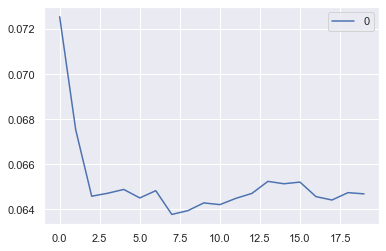

In [70]:
curve = pd.DataFrame(rmse_val)
curve.plot()

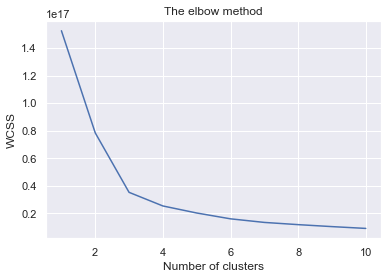

In [71]:
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') 
plt.show()

In [72]:
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors':[4,5,6,7,8,9,10,11,12,13]}
knn = neighbors.KNeighborsRegressor()
model = GridSearchCV(knn, params, cv=5)
model.fit(X_train,Y_train)
model.best_params_

{'n_neighbors': 13}

In [73]:
X = np.array(X)
X

array([[1.0000000e+00, 0.0000000e+00, 9.8396400e+03, 1.6029636e+05,
        0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00, 1.8642800e+03, 1.9384720e+04,
        0.0000000e+00],
       [1.0000000e+00, 3.0000000e+00, 1.8100000e+02, 0.0000000e+00,
        0.0000000e+00],
       ...,
       [8.0000000e+00, 2.0000000e+00, 7.5244540e+04, 0.0000000e+00,
        1.6700000e+02],
       [8.0000000e+00, 0.0000000e+00, 3.0743600e+03, 7.1676400e+03,
        0.0000000e+00],
       [8.0000000e+00, 0.0000000e+00, 1.1465210e+04, 0.0000000e+00,
        0.0000000e+00]])

In [74]:
kmeans = KMeans(n_clusters = 13, init = 'k-means++', max_iter = 1000, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(X)

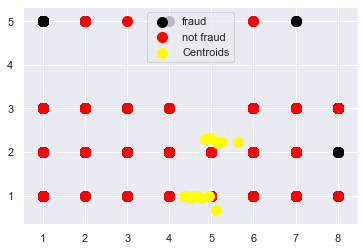

In [75]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'black', label = 'fraud')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'red', label = 'not fraud')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

## ANN  DEEP LEARNING

In [76]:
from __future__ import print_function
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

Using TensorFlow backend.
C:\Users\HP\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\HP\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\HP\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\HP\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: Future

In [77]:
X=df_new.drop(["isFraud"],axis=1)
Y=df_new["isFraud"]
model = Sequential()
model.add(Dense(12, input_dim=5, activation='relu'))
model.add(Dense(5, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [78]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [79]:
model.fit(X,Y, epochs=50, batch_size=10)


Epoch 1/50
14246/14246 [==============================] - 5s 353us/step - loss: 579.0099 - accuracy: 0.9945
Epoch 2/50
14246/14246 [==============================] - 3s 184us/step - loss: 282.1916 - accuracy: 0.9736
Epoch 3/50
14246/14246 [==============================] - 3s 187us/step - loss: 191.6249 - accuracy: 0.9945
Epoch 4/50
14246/14246 [==============================] - 3s 191us/step - loss: 128.1939 - accuracy: 0.9945
Epoch 5/50
14246/14246 [==============================] - 3s 182us/step - loss: 78.2649 - accuracy: 0.9945
Epoch 6/50
14246/14246 [==============================] - 3s 184us/step - loss: 44.5281 - accuracy: 0.9945
Epoch 7/50
14246/14246 [==============================] - 3s 187us/step - loss: 15.4540 - accuracy: 0.9945
Epoch 8/50
14246/14246 [==============================] - 3s 189us/step - loss: 0.0314 - accuracy: 0.9945
Epoch 9/50
14246/14246 [==============================] - 3s 202us/step - loss: 0.0311 - accuracy: 0.9945
Epoch 10/50
14246/14246 [=========

In [80]:
_, accuracy = model.evaluate(X,Y)
print('ANN ModelAccuracy: %.2f'%(accuracy*100))

14246/14246 [==============================] - 0s 27us/step
ANN ModelAccuracy: 99.45


## PAIRPLOTS

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


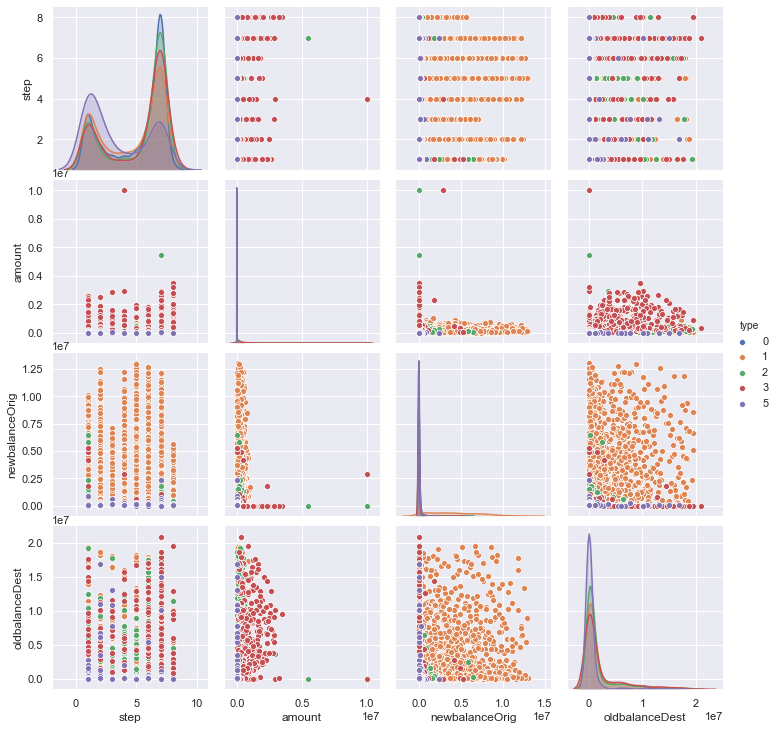

In [81]:
sns.pairplot(X_train[["step","type","amount","newbalanceOrig","oldbalanceDest"]],diag_kind='kde',hue='type')

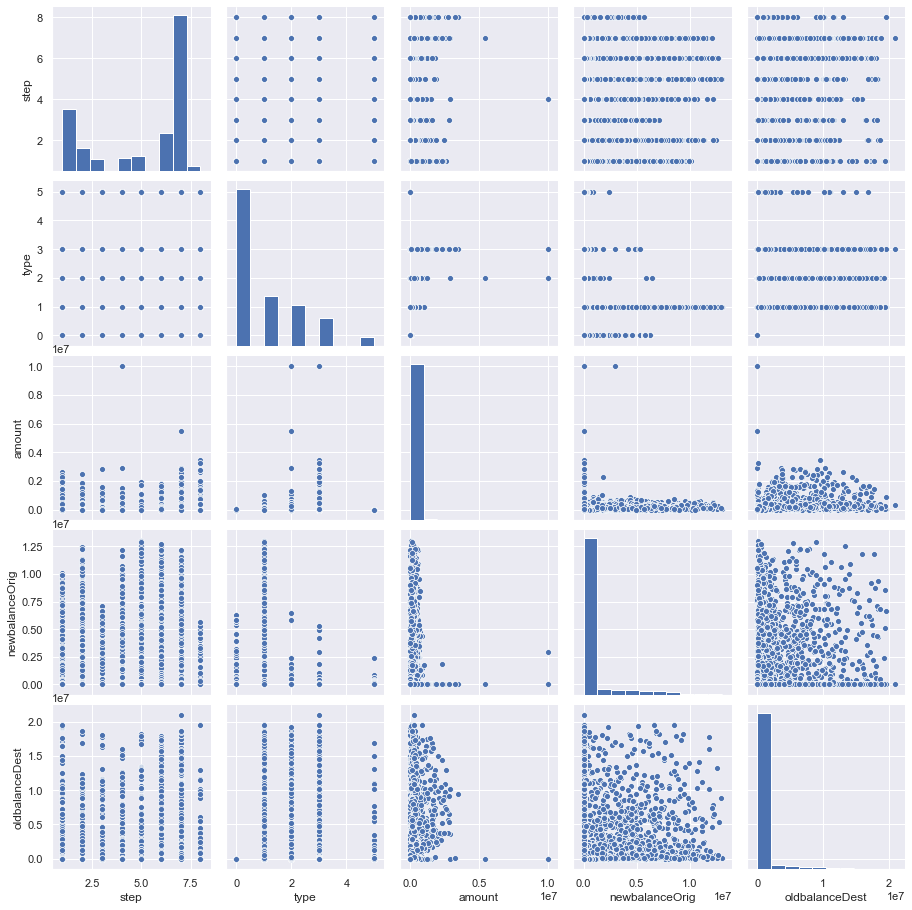

In [82]:
sns.pairplot(X_train[["step","type","amount","newbalanceOrig","oldbalanceDest"]])
sns.set(rc={"figure.figsize":(20,20)})

## PREDICTING VALUES

In [83]:
logit.predict([[1,2,10000,16296.36,0.0]]) # Logistic Regression

array([0.])

In [84]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,predictions))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      2837
         1.0       0.50      0.46      0.48        13

    accuracy                           1.00      2850
   macro avg       0.75      0.73      0.74      2850
weighted avg       1.00      1.00      1.00      2850



In [85]:
rf_clf.predict([[1,2,10000,16296.36,0.0]])  # Random Forest Classifier 

array([0.])